# Chapter 11: Matrix Determinant

- content: pp 301 - 321
- exercises: pp 322 - 326

In [1]:
# import commonly used Python libraries
import numpy as np
from matplotlib import pyplot as plt

## 11.1 Four things to know about determinants

**1. Only for square matrices**
- The determinant is defined only for square matrices.

**2. A matrix has one determinant**
- The determinant is a scalar that contains information about the matrix.
- The determinant is unique in the sense that a matrix has **exactly one** determinant.
- Of course many matrices can share the same numerical value for a determinant, but it's not possible for one matrix to have 2 determinants.

**3. Zero for singular matrices**
- The determinant is zero for a non-invertible matrix (a matrix with rank $r < M$).
- You can also say that a matrix with linear dependencies in either the columns or in the rows has a determinant of zero.

**4. Notation**
- The determinant is indicated using either:
  - single vertical lines around the matrix letter $|A|$
  - by printing the contents of the matrix with vertical lines instead of square brackets $\begin{vmatrix}1 & 2 \\ 3 & 4\end{vmatrix}$
  - by using $det(A)$.
  - with the Greek character $\Delta$
- Single vertical lines are used to disambiguate the determinant $|A|$ from the magnitude or norm $||A||$

Thus:
$$
det(A) = |A| = 
\begin{vmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{vmatrix}
= \Delta
$$

### Applications:
There are several applications of the determinant.
1. Computing the inverse (and determining whether a matrix has an inverse) (Ch 12)
2. Uncovering the eigenvalues of a matrix (Ch 15)
3. If a matrix contains the vertices of a polygon, then the absolute value of the determinant measures the volume of that polygon (not used in this book)

### Computing the determinant:
- The determinant is really difficult to compute for large matrices (i.e. anything larger than 4x4)
- In fact, computers are unable to compute the determinant reliably for large matrices (this comes up in the code challenge later)
- However, there are handy short-cuts for computing the determinant of 2x3 and 3x3 matrices, so they will be introduced first, then the "full" determinant formula after

## 11.2 Determinant of a 2x2 matrix

The determinant of a 2x2 matrix is the product of the diagonal minus the product of the off-diagonal.  
*note that this only works on 2x2 matrices*
$$
det 
\begin{pmatrix}\begin{bmatrix}
a & b \\
c & d
\end{bmatrix}\end{pmatrix}
=
\begin{vmatrix}
a & b \\
c & d
\end{vmatrix}
= ad - bc
$$

Important point:
- every reduced-rank matrix has a determinant of zero (one definition of a singular matrix is a matrix with a determinant of zero)

### Determinant and transpose
- The determinant is robust to the transpose operation.  In other words, $det(A) = det(A^T)$
- This is because the determinant is a property of the *matrix*, not of the rows or the columns

## 11.3 The characteristic polynomial

- we can transform a matrix into an equation with the matrix elements on one side of the equation, and the determinant on the other side.
- for a 2x2 matrix, that looks like:
$$ab-cd=\Delta$$

- this is interesting because it means that we can solve for a particular matrix element if we know the determinant
e.g.
$$
\begin{vmatrix}
2 & 7 \\
4 & \lambda
\end{vmatrix}
= 4
\Rightarrow
2 \lambda - 28 = 4
\Rightarrow
2 \lambda = 32
\Rightarrow
\lambda = 16
$$

### Multiple solutions
- note that in some cases times there can be multiple solutions e.g. $\lambda^2=4 \Rightarrow \lambda = \pm 2$
- *the Fundamental Theorem of Algebra tells us that an nth order polynomial has exactly n roots (though they might be complex-valued)*

- additionally, there can be multiple solutions even without polynomials.  
e.g.:
$$
\begin{vmatrix}
1-\lambda & 3 \\
3 & 1-\lambda
\end{vmatrix}
= 0
\Rightarrow
\lambda = -2, 4
$$

- this creates 2 possible matrix solutions depending on lambda

$$
\lambda=-2
\Rightarrow
\begin{bmatrix}
3 & 3 \\
3 & 3
\end{bmatrix}
$$
$$
\lambda=4
\Rightarrow
\begin{bmatrix}
-3 & 3 \\
3 & -3
\end{bmatrix}
$$

- if you compare the two matrices, we can convert one into the other by subtracting a constant from the diagonal of the matrix.
- This is called a *shift* and something covered in previous chapters: we shifted the matrix by $-\lambda I$
- Therefore, we could rewrite the above equations as:
$$
det
\begin{pmatrix}
\begin{bmatrix}
1 & 3 \\
3 & 1
\end{bmatrix}
- \lambda I
\end{pmatrix}
= 0
$$

### The characteristic polynomial of a matrix

- We have now arrived at an equation called the characteristic polynomial of a matrix:
$$det(A-\lambda I)$$

- The characteristic polynomial is a big deal.
- It allows us to represent a matrix in terms of a polynomial expression, and polynomials have a lot of great properties in mathematics.
- But more importantly for our purposes in this book, when the characteristic polynomial is set to zero (that is, when we assume that the determinant of the shifted matrix is 0), the $\lambda$'s--the roots of the polynomial--are the eigenvalues of the matrix.
  - Pretty neat, eh?  More on this in Ch 15.

## 11.4 Determinant of a 3x3 matrix

- The shortcut to get the determinant of a 3x3 matrix is easiest to understand visually
- there are 2 ways to think about the procedure:
  - one that "wraps around" the matrix
  - one that augments the matrix with the first 2 columns
  - of course they aren't different methods, just different ways of interpreting the same procedure.  Just use whichever method is easier to remember.

**See p. 309 in book for visual diagrams of the augmented and wrap around interpretations**

Equation:
$$
\begin{vmatrix}
a & b & c \\
d & e & f \\
g & h & i
\end{vmatrix}
= 
aei + bfg + cdh - ceg - bdi - afh
$$

### Determinant and transpose
- We can now show that the determinant of a 3x3 matrix is the same before and after transposing.

$$
\begin{vmatrix}
a & b & c \\
d & e & f \\
g & h & i
\end{vmatrix}
= 
aei + bfg + cdh - ceg - bdi - afh
$$

$$
\begin{vmatrix}
a & d & g \\
b & e & h \\
c & f & i
\end{vmatrix}
= 
aei + dhc + gbf - gec - dbi - ahf
$$

## 11.5 Full procedure to compute the determinant

- It turns out that the aforementioned tricks for computing the determinants of 2x2 and 3x3 matrices are simplifications of the full procedure to compute the determinant of any sized matrix.
- It gets really complicated quickly, so it'll be illustrated with a 4x4 matrix below

### Procedure

- In general, the procedure is to multiply the $i^{th}$ element of the first row of the matrix by the determinat of the 3x3 submatrix created by excluding the $i^{th}$ row and $i^{th}$ column.
- That gives 4 numbers, you then add the 1st and 3rd, and subtract the 2nd and 4th

$$
\begin{vmatrix}
a & b & c & d \\
e & f & g & h \\
i & j & k & l \\
m & n & o & p
\end{vmatrix}
= a \times
\begin{vmatrix}
f & g & h \\
j & k & l \\
n & o & p
\end{vmatrix}
- b \times
\begin{vmatrix}
e && g & h \\
i && k & l \\
m && o & p
\end{vmatrix}
+ c \times
\begin{vmatrix}
e & f && h \\
i & j && l \\
m & n && p
\end{vmatrix}
- d \times
\begin{vmatrix}
e & f & g \\
i & j & k \\
m & n & o
\end{vmatrix}
$$
*note the alternating plus and minus symbols*

- thus, computing the determinant of a 4x4 matrix actually requires computing four 3x3 determinants.
- Interestingly, you can modify this procedure to go column-wise rather than row-wise.

## 11.6 Determinant of a triangular matrix

- **key takeaway: The determinant of a triangular matrix is equal to the product of its diagonal elements.**
- why is this true? we can prove it with an upper-triangular 2x2 matrix:
$$
\begin{vmatrix}
a & b \\
0 & d
\end{vmatrix}
= ad - b0 = ad
$$

- and for a 3x3 matrix
$$
\begin{vmatrix}
a & b & c \\
0 & e & f \\
0 & 0 & i
\end{vmatrix}
= aei + bf0 + c00 - ce0 - b0i - af0 = aei
$$

- In mathematics, proofs don't necessarily lead to intuition.
- The reason *why* the determinant equals the product of the diagonals for any triangular matrix is this:
  - All but one of the individual terms in the determinant formula have at least one element from the upper-triangle and at least one element from the lower-triangle.
  - The one exception is the main diagonal.

In [2]:
# Computing the determinant in Python
# (simple to do for small matrices, numerically unstable for large matrices)
A = np.random.randn(3,3)
np.linalg.det(A)

-1.222415321250788

## 11.7 Determinant and row reduction

The procedures involved in row reduction (swapping rows, adding multiples of rows to other rows, and multiplying a row by a constant) have implications for the determinant of the matrix.  Let's explore each of these in turn

### Row swapping
- Curiously enough, swapping the rows of a matrix flips the sign of the determinant, without affecting its magnitude.
- for a 2x2 matrix, it effectively changes $ad - cb$ into $cb - da$.
- for a 3x3 matrix, swapping rows once flips the sign, then swapping again flips the sign once more
- Thus, **each row swap reverses the sign of the determinant.**
  - two swaps returns you back to the original sign

### Adding multiples of rows
- **Adding a multiple of one row to another does not change the determinant**

### Row-scalar multiplication
- **Multiplying 1 row by some scalar $\beta$ scales the determinant by $\beta$**

### Summary
- Row swap $\rightarrow \Delta = - \Delta$
- Add one row to another $\rightarrow \Delta = \Delta$
- Scale 1 row by $\beta$ $\rightarrow \Delta = \beta \Delta$

## 11.8 Determinant & matrix-scalar multiplication

- What happens to the determinant of a scalar-multiplication over the entire matrix $|A|$ and $|\beta A|$?
- One way to think about it is that matrix-scalar multiplication is the same as row-scalar multiplication repeated for all rows.
- This means that the determinant is exponentiated by the number of rows
$$
det(\beta A) = \beta^M det(A), \;\;\;\; A \in R^{MxM}
$$

## 11.9 Determinant in theory and in practice

- As mentioned, the determinant has several applications including computing the matrix inverse and discovering the eigenvalues.
- Clearly the determinant is important, but it is difficult to compute for large matrices.
- The main point is that the determinant is an important concept to understand for the *theory* of linear algebra, but you should avoid computing or using it directly when *implementing* linear algebra concepts on computers.

## 11.10 - 11.11 Exercises

do in group discussion?

## 11.12 - 11.13 Code Challenges

### Code Challenge 1

Write code that illustrates Equation 11.26 (from 11.8 Determinant & matrix-scalar multiplication).  Your code should generate a 4x4 matrix comprising integers between 0 and 10, then generate a random integer $\beta$ between -10 and -1, and then print out the left- and right-hand sides of Equation 11.26

In [3]:
# create a 4x4 matrix made of integers between 0 and 10
A = np.random.randint(0, 11, (4,4))
print(A)

[[ 8  2  4  9]
 [ 7  9  2  2]
 [ 1 10  8  0]
 [ 4  7  1  0]]


In [4]:
# create a random integer beta between -10 and -1
beta = np.random.randint(-10, 0)
print(beta)

-8


In [5]:
# print out left-hand side of equation 11.26 (from 11.8 Determinant & matrix-scalar multiplication)
np.linalg.det(beta * A)

430080.00000000146

In [6]:
# print out right-hand side of equation 11.26 (from 11.8 Determinant & matrix-scalar multiplication)
beta**A.shape[0] * np.linalg.det(A)

430080.00000000215

### Code Challenge 2

The goal is to demonstrate the numerical instabilities of determinant calculations.  Implement the following in code:

1. Create a matrix of normally distributed random numbers.
2. Ensure that the matrix is reduced-rank.
3. Compute the absolute value of the determinant (we are interested in whether the determinant deviates from zero; the sign doesn't matter).

Run these 3 steps in a double for-loop: 1) loops through matrix sizes ranging from 3x3 to 30x30, and 2) loops through three steps 100 times.  This is equivalent to repeating a scientific experiment multiple times.

Finally, make a plot of the average determinant as a function of the matrix size.  In theory, all of these determinants should be zero!  (but due to numerical instability, they are not).

Text(0, 0.5, 'Log determinant')

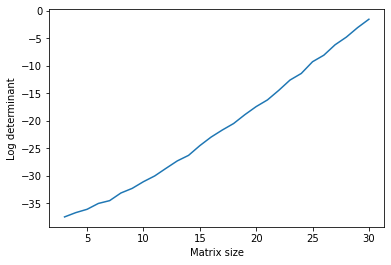

In [7]:
sizes = range(3, 31)
iters = 100
dets = np.zeros([len(sizes), iters])

for i in sizes: # loop from 3 to 30
  detAgg = 0
  for j in range(iters):
    A = np.random.randn(i,i)              # 1. create a matrix of normally distributed random numbers
    A[:,0] = A[:,1]                       # 2. copy a column to ensure that the matrix is reduced-rank
    dets[i-3][j] = abs(np.linalg.det(A))  # 3. Compute the absolute value of the determinant

plt.plot(sizes, np.log(np.mean(dets, axis=1)))
plt.xlabel('Matrix size')
plt.ylabel('Log determinant')